In [1]:
# Loading necessary modules.
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from os import fspath
%matplotlib inline
import seaborn as sns
import math
import pandas as pd
import MDAnalysis as mda
from MDAnalysis.analysis.align import AlignTraj
from MDAnalysis.analysis.rms import RMSD, RMSF
from MDAnalysis.analysis.pca import PCA, cosine_content
from MDAnalysis.analysis import diffusionmap
from MDAnalysis.transformations.positionaveraging import PositionAverager
import pandas as pd

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import squareform

import matplotlib.patches as patches

/home/giacomo/micromamba/envs/QCB/lib/python3.12/site-packages/Bio/Application/__init__.py:39: BiopythonDeprecationWarning: The Bio.Application modules and modules relying on it have been deprecated.

Due to the on going maintenance burden of keeping command line application
wrappers up to date, we have decided to deprecate and eventually remove these
modules.

We instead now recommend building your command line and invoking it directly
with the subprocess module.
  warnings.warn(


In [2]:
data_path = "../../data_3eig/02_processed/02_npt/"
config_file = data_path + "step5_prod_0.tpr"
concat_traj_file = data_path + "prod_cat.xtc"

In [3]:
aligned_traj = mda.Universe(config_file, concat_traj_file)
ref_traj = mda.Universe(config_file, concat_traj_file)    
ref_traj.trajectory[0]

< Timestep 0 with unit cell dimensions [71.145935 71.145935 71.145935 90.       90.       90.      ] >

In [4]:
def blocking(df, obs, time="t"):
    # blocking
    len_df = max(df[time])
    blk_num = np.arange(4, 1000)
    blk_sizes = [len_df // i for i in blk_num]
    # blk_sizes = np.arange(2, np.floor(len_df), 100, dtype = int)
    stdev = np.zeros(len(blk_sizes))
    
    for i, l in enumerate(blk_sizes):
        blk_avg = df[obs].groupby(df[time]//l).mean()
        stdev[i] = np.sqrt(blk_avg.var()/len(blk_avg))
    plt.plot(blk_sizes, stdev, '*-')
    # window_size = 6
    # kernel = np.ones(window_size) / window_size
    # plt.plot(blk_sizes, np.convolve(stdev, kernel, mode='same'), '*-')
    plt.xlabel("block length")
    plt.title(f"total lenght {len_df}")
    plt.show()

# Loop 1 to 3

Text(0, 0.5, 'RMSD $[\\AA]$')

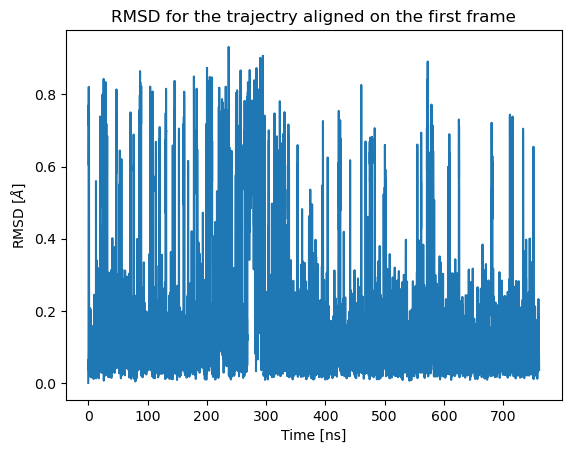

In [5]:
sel = "name CA and resid 1 to 3"

R = RMSD(aligned_traj, ref_traj, select=sel).run()

plt.title("RMSD for the trajectry aligned on the first frame")
plt.plot(R.results.rmsd[:,0] / 10, R.results.rmsd[:,2])
plt.xlabel('Time [ns]')
plt.ylabel(r'RMSD $[\AA]$')

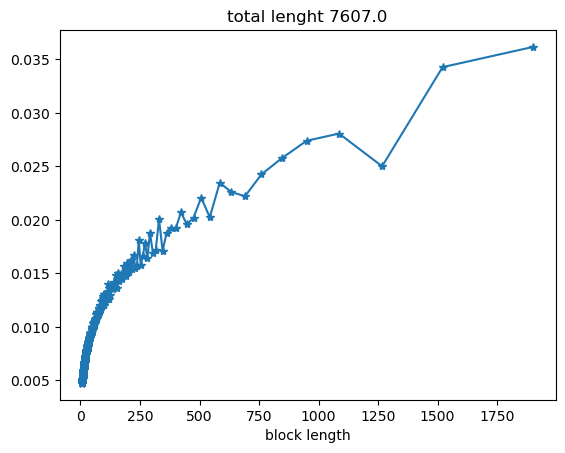

In [6]:
df = pd.DataFrame({"t": R.results.rmsd[:,0], "rmsd": R.results.rmsd[:,2]})
blocking(df, "rmsd")

# Loop 18 to 24

Text(0, 0.5, 'RMSD $[\\AA]$')

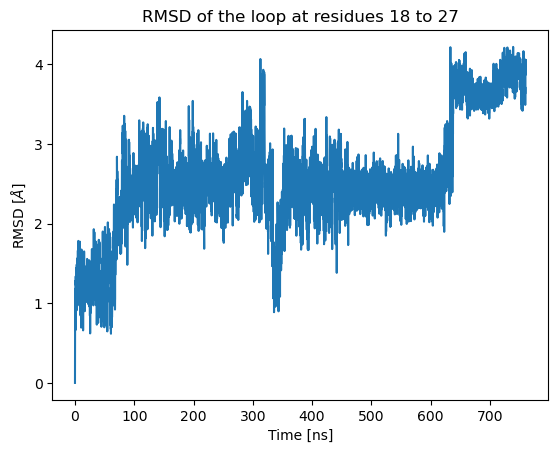

In [7]:
sel = "name CA and resid 18 to 27"
sel2 = "name CA and resid 18 to 24"

R = RMSD(aligned_traj, ref_traj, select=sel).run()
R2 = RMSD(aligned_traj, ref_traj, select=sel2).run()

plt.title("RMSD of the loop at residues 18 to 27")
plt.plot(R.results.rmsd[:,0] / 10, R.results.rmsd[:,2])
#plt.plot(R2.results.rmsd[:,0] / 10, R2.results.rmsd[:,2])
plt.xlabel('Time [ns]')
plt.ylabel(r'RMSD $[\AA]$')

# Loop 41 to 46

Text(0, 0.5, 'RMSD $[\\AA]$')

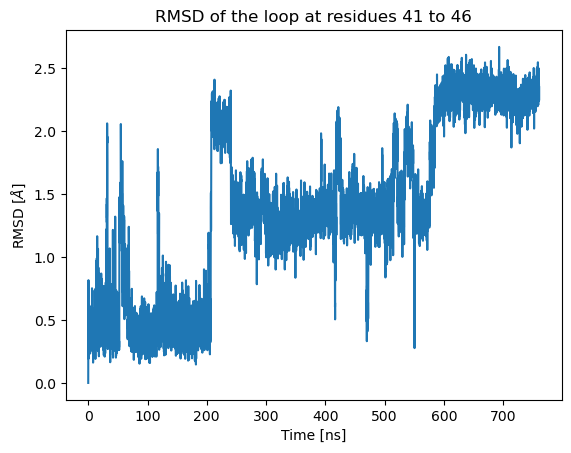

In [8]:
sel = "name CA and resid 41 to 46"

R = RMSD(aligned_traj, ref_traj, select=sel).run()

plt.title("RMSD of the loop at residues 41 to 46")
plt.plot(R.results.rmsd[:,0] / 10, R.results.rmsd[:,2])
plt.xlabel('Time [ns]')
plt.ylabel(r'RMSD $[\AA]$')

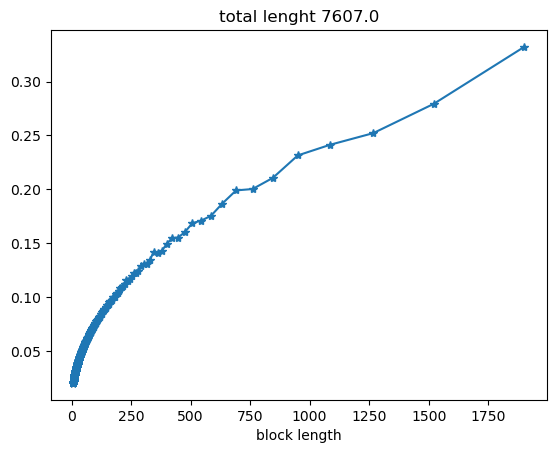

In [9]:
df = pd.DataFrame({"t": R.results.rmsd[:,0], "rmsd": R.results.rmsd[:,2]})
blocking(df, "rmsd")

# Loop 102 to 108

Text(0, 0.5, 'RMSD $[\\AA]$')

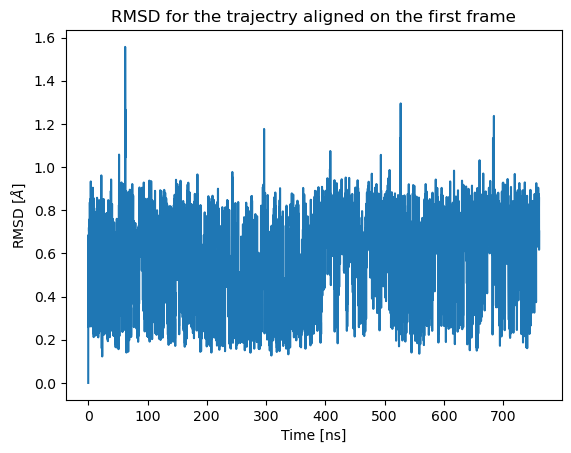

In [10]:
sel = "name CA and resid 102 to 108"

R = RMSD(aligned_traj, ref_traj, select=sel).run()

plt.title("RMSD for the trajectry aligned on the first frame")
plt.plot(R.results.rmsd[:,0] / 10, R.results.rmsd[:,2])
plt.xlabel('Time [ns]')
plt.ylabel(r'RMSD $[\AA]$')

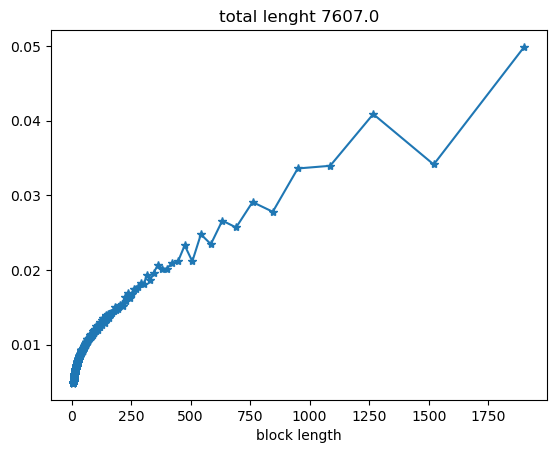

In [11]:
df = pd.DataFrame({"t": R.results.rmsd[:,0], "rmsd": R.results.rmsd[:,2]})
blocking(df, "rmsd")

# Loop 159 to 167

Text(0, 0.5, 'RMSD $[\\AA]$')

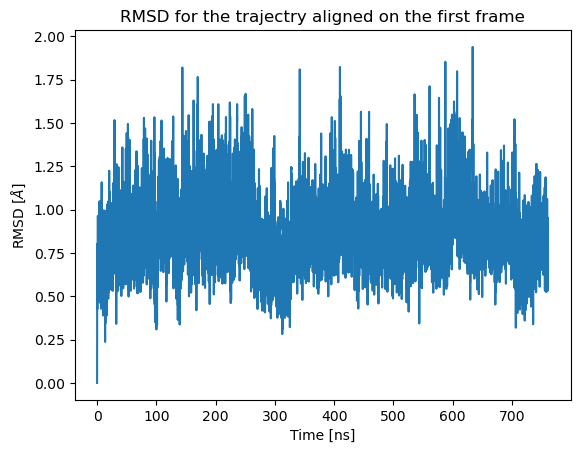

In [12]:
sel = "name CA and resid 159 to 167"

R = RMSD(aligned_traj, ref_traj, select=sel).run()

plt.title("RMSD for the trajectry aligned on the first frame")
plt.plot(R.results.rmsd[:,0] / 10, R.results.rmsd[:,2])
plt.xlabel('Time [ns]')
plt.ylabel(r'RMSD $[\AA]$')

# Loop 172 to 175

Text(0, 0.5, 'RMSD $[\\AA]$')

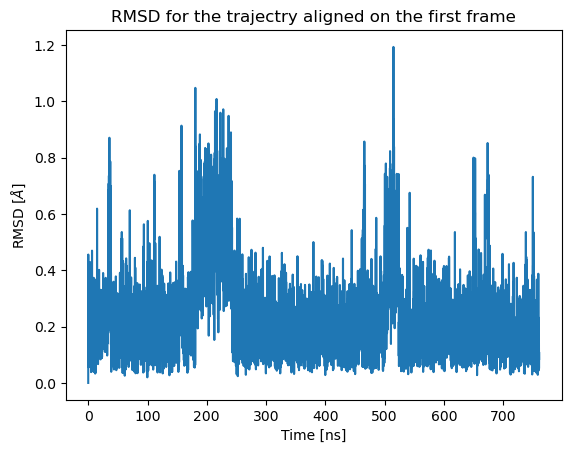

In [13]:
sel = "name CA and resid 172 to 175"

R = RMSD(aligned_traj, ref_traj, select=sel).run()

plt.title("RMSD for the trajectry aligned on the first frame")
plt.plot(R.results.rmsd[:,0] / 10, R.results.rmsd[:,2])
plt.xlabel('Time [ns]')
plt.ylabel(r'RMSD $[\AA]$')

# Total RMSD wo loop 41 to 46 and 18 to 27

Text(0, 0.5, 'RMSD $[\\AA]$')

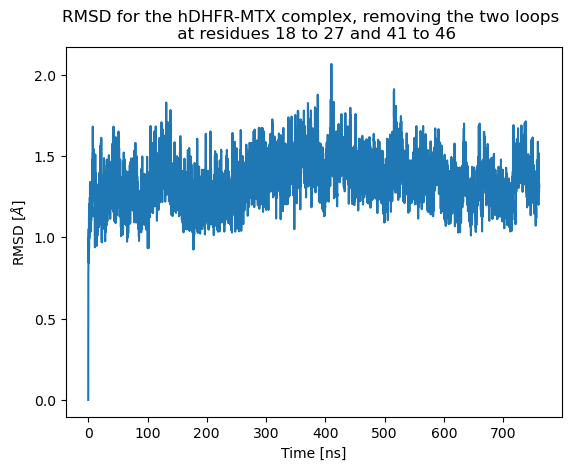

In [14]:
sel = "protein and name CA and not resid 41 to 46 and not resid 18 to 27"
R = RMSD(aligned_traj, ref_traj, select=sel).run()

sel_base = "name CA"
R_base = RMSD(aligned_traj, ref_traj, select=sel_base).run()

plt.title("RMSD for the hDHFR-MTX complex, removing the two loops \n at residues 18 to 27 and 41 to 46")
plt.plot(R.results.rmsd[:,0] / 10, R.results.rmsd[:,2])
# plt.plot(R_base.results.rmsd[:,0] / 10, R_base.results.rmsd[:,2])
plt.xlabel('Time [ns]')
plt.ylabel(r'RMSD $[\AA]$')

In [15]:
pca = PCA(aligned_traj, select=sel)
pca.run()

pca_space = pca.transform(aligned_traj.select_atoms(sel),2)
pca_data = pd.DataFrame(pca_space, columns=['first_comp','second_comp'])
pca_data["group"] = (pca_data.index // 40) * 4

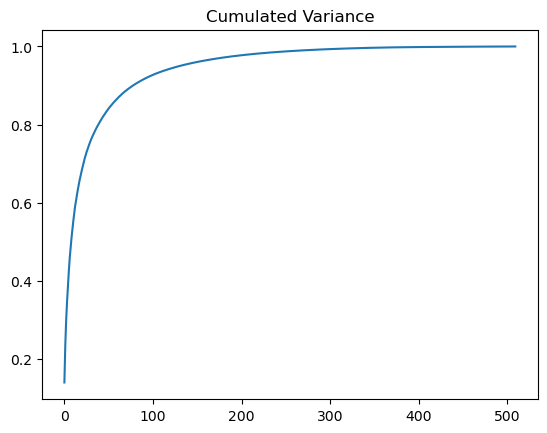

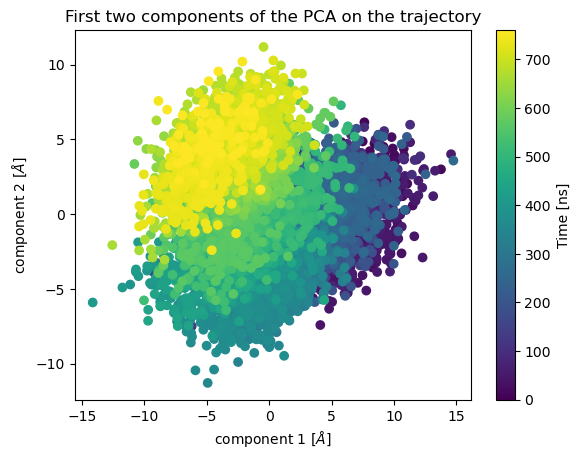

In [16]:
plt.title('Cumulated Variance')
plt.plot(pca.results.cumulated_variance)
plt.show()

plt.title("First two components of the PCA on the trajectory")
scatter = plt.scatter(pca_data['first_comp'], pca_data['second_comp'], c=pca_data['group'])
plt.xlabel(r"component 1 $[\AA]$")
plt.ylabel(r"component 2 $[\AA]$")
plt.colorbar(scatter, label = 'Time [ns]')

# "RGYR" of the plot 

5.641418271366394


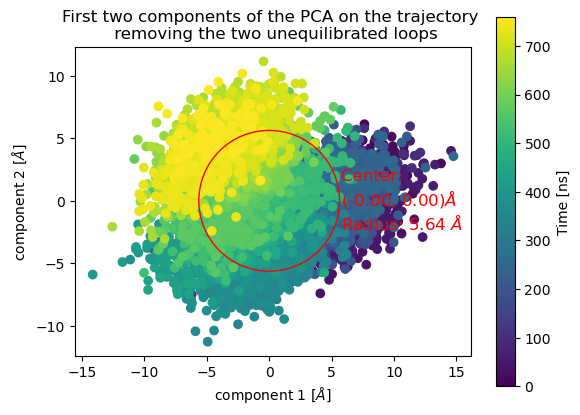

In [17]:
avg_c1 = pca_data['first_comp'].mean()
avg_c2 = pca_data['second_comp'].mean()

rgyr = np.sqrt(((pca_data['first_comp']-avg_c1)**2 + (pca_data['second_comp']-avg_c2)**2).mean())
print(rgyr)

x, y = avg_c1, avg_c2  # Center of the circle
r = rgyr      # Radius of the circle

plt.title("First two components of the PCA on the trajectory \n removing the two unequilibrated loops")
scatter = plt.scatter(pca_data['first_comp'], pca_data['second_comp'], c=pca_data['group'])
plt.xlabel(r"component 1 $[\AA]$")
plt.ylabel(r"component 2 $[\AA]$")
plt.colorbar(scatter, label = 'Time [ns]')

circle = patches.Circle((x, y), r, edgecolor='r', facecolor='none', label='Circle')
plt.gca().add_patch(circle)
text = f'Center: \n({x:.2f}, {y:.2f})$\\AA$\nRadius: {r:.2f} $\\AA$'
plt.text(x + r + 0.1, y, text, fontsize=12, color='red', verticalalignment='center')
plt.gca().set_aspect("equal")